### Challenge : AGE, GENDER AND ETHNICITY (FACE DATA)

Il s'agit d'un grand challenge lancé par @Nipun_Arora. Le but général est de trouver une solution Deep Learning qui permettre d'une part de prédire le sexe (Homme, Femme) et l'origine ethnique (Africain, asiatique, Europeen ..) de la personne. Et d'autre part de prédire l'age de la personne.

[Ici tu vas trouver la base de données ainsi la description du challenge, Click Here](https://www.kaggle.com/nipunarora8/age-gender-and-ethnicity-face-data-csv)

Donc il s'agit de deux problèmes classique : classification et régression.

- Une classification en fonction de genre : classification binaire
- Une classification en fonction de la race : classification multi-classes
- Une régression par rapport à l'age de la personne.

Mais avant d'entamer à répondre de 3 sous problèmes, on va tout d'abord decrire la base de données

In [20]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

la base de données est stockée dans un fichier CSV. il contient 5 colonnes : 
* age : represente l'age de la personne (float)
* ethnicity : la race de la personne    (int) 
* gender : le sexe de la personne       (int)
* img_name : l'id de l'image            (txt)
* pixel : la liste des pixels de l'image (liste de int)

En total, nous avons 23705 échantillons 

In [21]:
df = pd.read_csv("age_gender.csv")
df['pixels'] = df.apply(lambda row:   list(map(int, row['pixels'].split(' '))) , axis=1)
df.describe()

,age,ethnicity,gender
count,23705.000000,23705.000000,23705.000000
mean,33.300907,1.269226,0.477283
std,19.885708,1.345638,0.499494
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000
75%,45.000000,2.000000,1.000000
max,116.000000,4.000000,1.000000


Pour la colonne de pixels, on a transformé la forme précédente (chaine de caractères) en un vecteur des entiers (0 - 255) qui représente la valeur de pixel

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


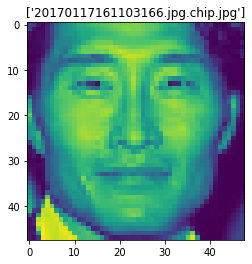

In [23]:
img = df['pixels'].sample().values[0]
name_img = df['img_name'].sample().values

n = 48
img = np.array(img).reshape(n, -1)
#img = np.array([int(e) for e in img.values[0].split()]).reshape(n, -1)
# plotting the image
plt.title(name_img)
plt.imshow(img, interpolation='nearest')

In [26]:
X = np.vstack(df['pixels'].values)
print("Shape dataset :", X.shape)

Shape dataset : (23705, 2304)


**Visualisation by Ethnicity**

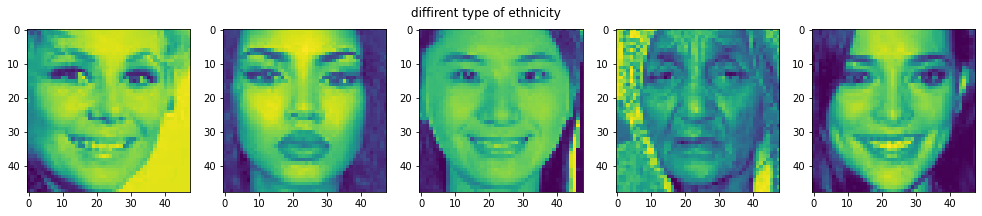

In [91]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(17, 3))

fig.suptitle('diffirent type of ethnicity')

n = 48


img = df['pixels'][df.ethnicity==0].sample().values[0]
img = np.array(img).reshape(n, -1)
ax1.imshow(img, interpolation='nearest')

img = df['pixels'][df.ethnicity==1].sample().values[0]
img = np.array(img).reshape(n, -1)
ax2.imshow(img, interpolation='nearest')

img = df['pixels'][df.ethnicity==2].sample().values[0]
img = np.array(img).reshape(n, -1)
ax3.imshow(img, interpolation='nearest')

img = df['pixels'][df.ethnicity==3].sample().values[0]
img = np.array(img).reshape(n, -1)
ax4.imshow(img, interpolation='nearest')

img = df['pixels'][df.ethnicity==4].sample().values[0]
img = np.array(img).reshape(n, -1)
ax5.imshow(img, interpolation='nearest')

In [74]:
name_ethnicity = ['Europeen', 'African', 'East-Asian', 'Indian', 'Latino']

<BarContainer object of 5 artists>

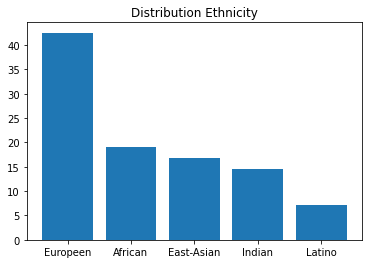

In [89]:
plt.title("Distribution Ethnicity")
plt.bar(name_ethnicity, df.ethnicity.value_counts()/len(df.ethnicity)*100)

**Visualisation By gender**

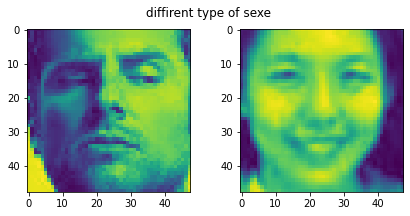

In [97]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))

fig.suptitle('diffirent type of sexe')

n = 48 # taille de l'image

img = df['pixels'][df.gender==0].sample().values[0]
img = np.array(img).reshape(n, -1)
ax1.imshow(img, interpolation='nearest')

img = df['pixels'][df.gender==1].sample().values[0]
img = np.array(img).reshape(n, -1)
ax2.imshow(img, interpolation='nearest')

In [83]:
name_gender = ['Male', 'Female']

<BarContainer object of 2 artists>

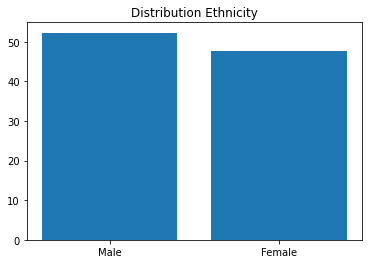

In [90]:
plt.title("Distribution Ethnicity")
plt.bar(name_gender, df.gender.value_counts()/len(df.ethnicity)*100)

**Preprocessing dataset**

In [27]:
X = X /225

**Feature extraction**

In [28]:
# example of loading the keras facenet model
from keras.models import load_model, Model
# load the model
model = load_model('facenet_keras.h5')
# summarize input and output shape
model.summary()

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 79, 79, 32)   96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 79, 79, 32)   0           Conv2d_1a_3x3_BatchNorm[0][0]    
________________________________________________________________________________

__________________________________________________________________________________________________
Block35_2_Branch_2_Conv2d_0b_3x (None, 17, 17, 32)   9216        Block35_2_Branch_2_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block35_2_Branch_1_Conv2d_0a_1x (None, 17, 17, 32)   96          Block35_2_Branch_1_Conv2d_0a_1x1[
__________________________________________________________________________________________________
Block35_2_Branch_2_Conv2d_0b_3x (None, 17, 17, 32)   96          Block35_2_Branch_2_Conv2d_0b_3x3[
__________________________________________________________________________________________________
Block35_2_Branch_1_Conv2d_0a_1x (None, 17, 17, 32)   0           Block35_2_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block35_2_Branch_2_Conv2d_0b_3x (None, 17, 17, 32)   0           Block35_2_Branch_2_Conv2d_0b_3x3_
__________

Block35_5_Branch_1_Conv2d_0a_1x (None, 17, 17, 32)   96          Block35_5_Branch_1_Conv2d_0a_1x1[
__________________________________________________________________________________________________
Block35_5_Branch_2_Conv2d_0b_3x (None, 17, 17, 32)   96          Block35_5_Branch_2_Conv2d_0b_3x3[
__________________________________________________________________________________________________
Block35_5_Branch_1_Conv2d_0a_1x (None, 17, 17, 32)   0           Block35_5_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block35_5_Branch_2_Conv2d_0b_3x (None, 17, 17, 32)   0           Block35_5_Branch_2_Conv2d_0b_3x3_
__________________________________________________________________________________________________
Block35_5_Branch_0_Conv2d_1x1 ( (None, 17, 17, 32)   8192        Block35_4_Activation[0][0]       
__________________________________________________________________________________________________
Block35_5_

__________________________________________________________________________________________________
Block17_3_Branch_1_Conv2d_0a_1x (None, 8, 8, 128)    384         Block17_3_Branch_1_Conv2d_0a_1x1[
__________________________________________________________________________________________________
Block17_3_Branch_1_Conv2d_0a_1x (None, 8, 8, 128)    0           Block17_3_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block17_3_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    114688      Block17_3_Branch_1_Conv2d_0a_1x1_
__________________________________________________________________________________________________
Block17_3_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    384         Block17_3_Branch_1_Conv2d_0b_1x7[
__________________________________________________________________________________________________
Block17_3_Branch_1_Conv2d_0b_1x (None, 8, 8, 128)    0           Block17_3_Branch_1_Conv2d_0b_1x7_
__________

Block17_7_Branch_0_Conv2d_1x1_B (None, 8, 8, 128)    384         Block17_7_Branch_0_Conv2d_1x1[0][
__________________________________________________________________________________________________
Block17_7_Branch_1_Conv2d_0c_7x (None, 8, 8, 128)    384         Block17_7_Branch_1_Conv2d_0c_7x1[
__________________________________________________________________________________________________
Block17_7_Branch_0_Conv2d_1x1_A (None, 8, 8, 128)    0           Block17_7_Branch_0_Conv2d_1x1_Bat
__________________________________________________________________________________________________
Block17_7_Branch_1_Conv2d_0c_7x (None, 8, 8, 128)    0           Block17_7_Branch_1_Conv2d_0c_7x1_
__________________________________________________________________________________________________
Block17_7_Concatenate (Concaten (None, 8, 8, 256)    0           Block17_7_Branch_0_Conv2d_1x1_Act
                                                                 Block17_7_Branch_1_Conv2d_0c_7x1_
__________

Mixed_7a_Branch_2_Conv2d_1a_3x3 (None, 3, 3, 256)    589824      Mixed_7a_Branch_2_Conv2d_0b_3x3_A
__________________________________________________________________________________________________
Mixed_7a_Branch_0_Conv2d_1a_3x3 (None, 3, 3, 384)    1152        Mixed_7a_Branch_0_Conv2d_1a_3x3[0
__________________________________________________________________________________________________
Mixed_7a_Branch_1_Conv2d_1a_3x3 (None, 3, 3, 256)    768         Mixed_7a_Branch_1_Conv2d_1a_3x3[0
__________________________________________________________________________________________________
Mixed_7a_Branch_2_Conv2d_1a_3x3 (None, 3, 3, 256)    768         Mixed_7a_Branch_2_Conv2d_1a_3x3[0
__________________________________________________________________________________________________
Mixed_7a_Branch_0_Conv2d_1a_3x3 (None, 3, 3, 384)    0           Mixed_7a_Branch_0_Conv2d_1a_3x3_B
__________________________________________________________________________________________________
Mixed_7a_B

Block8_4_Branch_1_Conv2d_0c_3x1 (None, 3, 3, 192)    0           Block8_4_Branch_1_Conv2d_0c_3x1_B
__________________________________________________________________________________________________
Block8_4_Concatenate (Concatena (None, 3, 3, 384)    0           Block8_4_Branch_0_Conv2d_1x1_Acti
                                                                 Block8_4_Branch_1_Conv2d_0c_3x1_A
__________________________________________________________________________________________________
Block8_4_Conv2d_1x1 (Conv2D)    (None, 3, 3, 1792)   689920      Block8_4_Concatenate[0][0]       
__________________________________________________________________________________________________
Block8_4_ScaleSum (Lambda)      (None, 3, 3, 1792)   0           Block8_3_Activation[0][0]        
                                                                 Block8_4_Conv2d_1x1[0][0]        
__________________________________________________________________________________________________
Block8_4_A

Total params: 22,808,144
Trainable params: 22,779,312
Non-trainable params: 28,832
__________________________________________________________________________________________________


In [29]:
import cv2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


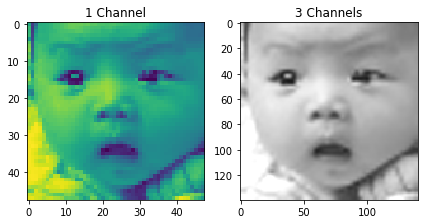

In [107]:
img_1C = X[1].reshape(n,n)

# add 3 channels
x = cv2.resize(t, dsize=(140, 140), interpolation=cv2.INTER_CUBIC)
x = x.reshape(1,x.shape[0],x.shape[1],1)
img_3C = np.repeat(x, 3, -1)

# plot figures
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(7,4))

ax1.title.set_text('1 Channel')
ax1.imshow(img_1C, interpolation='nearest')
ax2.title.set_text('3 Channels')
ax2.imshow(img_3C[0], interpolation='nearest')

In [33]:
from keras.applications.vgg16  import preprocess_input
def compute_features(model, x):
    # reshape
    t = X[0].reshape(n, n)
    # resize
    x = cv2.resize(x, dsize=(140, 140), interpolation=cv2.INTER_CUBIC)
    # reshape
    x = x.reshape(1,x.shape[0],x.shape[1],1)
    # add 3 channels
    x = np.repeat(x, 3, -1)
    #compute features
    features = model.predict(x)
    return features

In [34]:
couche = 'Dropout'
Extractor = Model(inputs = model.input, outputs = model.get_layer(couche).output)

In [35]:
Extractor.outputs

[<tf.Tensor 'Dropout/cond_1/Identity:0' shape=(None, 1792) dtype=float32>]

In [36]:
#feat = [compute_features(Extractor, x)[0] for x in X]
#transform to a numpy array 
#Features = np.array(feat)
#print("the shape of your features matrix is :",Features.shape)
#np.savez_compressed('features.npz', Features)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
the shape of your features matrix is : (23705, 1792)


In [37]:
#Features.shape

(23705, 1792)

In [98]:
#Features.tofile('foo.csv',sep=',',format='%.3f')
#np.savetxt("features.csv", Features, delimiter=",")

In [99]:
#Features[0]

array([-0.26213294,  0.2697125 , -0.1592544 , ..., -0.14040521,
        0.04174415, -0.27256873], dtype=float32)